# Installing + Importing Packages and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.2.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
apache-beam                   2.41.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
avro-python3                  1.10.2
Babel                         2.9.1
backcall                      0.2.0
bac

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Removing Potentially Corrupt Images (may alter predictions/accuracy if left in data) + Function Testing

In [6]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [7]:
data_dir = 'D:\data'

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
# displaying every image class we are working with (2 classes)
for image_class in os.listdir(data_dir):
    print(image_class)

cats
dogs


In [10]:
# Printing every image from each class
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

07CAT-STRIPES-mediumSquareAt3X-v2.jpg
0pexels-photo-1870376.jpeg.jpg
1200px-Cat03.jpg
1200x0.jpg
12mag-LOR-1-superJumbo.jpg
14-Fun-Facts-about-CatsTEASER.jpg
190718181632-cats-movie-trailer.jpg
1E3A3E62-B3CA-434A-8C3B3ED0C982FB69_source.jpg
220726-cat-theo-elise-ew-636p-6cd3b0.jpg
220805-domestic-cat-mjf-1540-382ba2.jpg
32665E6F-8D90-4567-9769D59E11DB7F26_source.jpg
370_1147_f1.jpeg
5d03c812-263a-43b7-a406-d82856a83281-cat8.jpg
6272fdedbadd0.image.jpg
719946ca-660e-4ebf-805a-2c3b7d221a85-Hero-3.jpg
84c-Cat17.jpg
AOh-ky1-_X8azw322QCS049T-hRIeJrdWk4xcYnFi6ues64-c-mo.jpg
Brody-CatsReview.jpg
cat-1.jpg
cat-10-e1573844975155-scaled.jpg
cat-217679.jpg
cat-behavior-issues.jpg
Cat-feature.jpg
cat.jpg
CatBeingStroked.jpg
CatsCaffeine-1024x576.png
Cat_poster_1.jpg
COMM-CATS-MOBILE-BANNER-640x520-c-default.jpg
df91f4de-332e-4961-afb7-415ac019f18b.jpg
DZPHYJ55JBHLVERW2UXVFS3XGQ.jpg
EBT-L-CATSHOW-0403-11.jpg
egypt_kitty_social.jpg
feral-cats-2048x1365.jpg
file-20170505-1693-ymh4bc.jpg
gettyimages-1

In [11]:
img = cv2.imread(os.path.join('D:\data','cats','cat-1.jpg'))

In [12]:
type(img)

numpy.ndarray

In [13]:
# viewing size dimensions of cat image
img.shape

(853, 1280, 3)

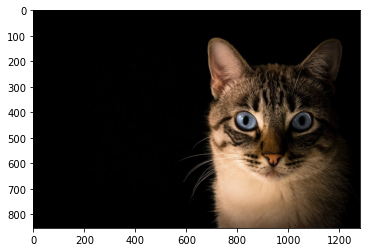

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Loading Data

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data = tf.keras.utils.image_dataset_from_directory('D:\data')

Found 1279 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
# Gets another batch from iterator
batch = data_iterator.next()

In [20]:
# numpy array image
batch[0].shape

(32, 256, 256, 3)

In [21]:
batch[1]

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0])

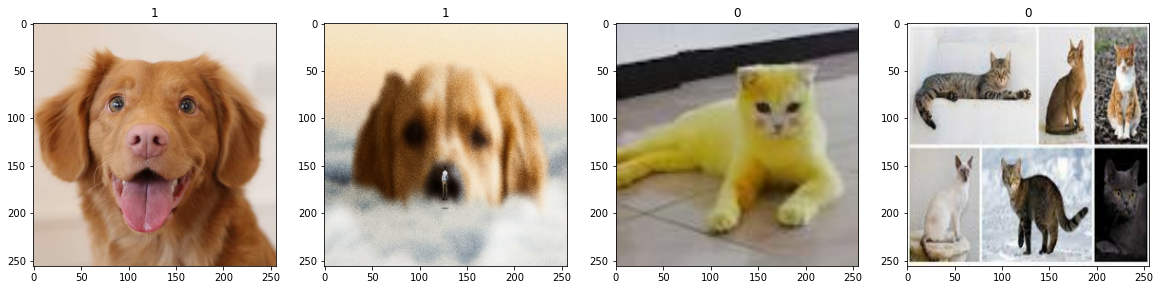

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
scaled = batch[0] / 255

In [24]:
scaled.min()

0.0

In [25]:
scaled.max()

1.0

# Data Preprocessing

### Scaling Data

In [26]:
data = data.map(lambda x,y: (x/255, y))

In [27]:
scaled_iterator = data.as_numpy_iterator()

In [28]:
batch = scaled_iterator.next()

In [29]:
data.as_numpy_iterator().next()

(array([[[[8.61351132e-01, 8.80958974e-01, 8.96645248e-01],
          [8.54901969e-01, 8.74509811e-01, 8.90196085e-01],
          [8.50980401e-01, 8.70588243e-01, 8.82352948e-01],
          ...,
          [8.32352936e-01, 8.71568620e-01, 9.06862736e-01],
          [8.06862772e-01, 8.57843161e-01, 8.93137276e-01],
          [7.92156875e-01, 8.43137264e-01, 8.78431380e-01]],
 
         [[8.54901969e-01, 8.74509811e-01, 8.90196085e-01],
          [8.50980401e-01, 8.70588243e-01, 8.86274517e-01],
          [8.50980401e-01, 8.70588243e-01, 8.82352948e-01],
          ...,
          [8.30131769e-01, 8.69347453e-01, 9.04641569e-01],
          [8.05208325e-01, 8.56188715e-01, 8.91482830e-01],
          [7.88802087e-01, 8.39782476e-01, 8.75076592e-01]],
 
         [[8.58823538e-01, 8.78431380e-01, 8.94117653e-01],
          [8.50980401e-01, 8.70588243e-01, 8.86274517e-01],
          [8.50980401e-01, 8.70588243e-01, 8.82352948e-01],
          ...,
          [8.25673997e-01, 8.64889681e-01, 9.0018

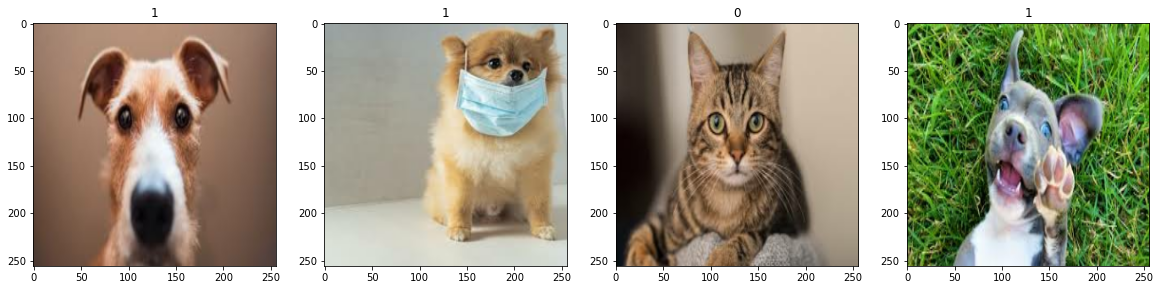

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
# DOG - Labeled '1', CAT - Labeled '0'

### Splitting the Data into Train, Valid, Test

In [31]:
len(data)

40

In [32]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

In [33]:
train_size+val_size+test_size

40

In [34]:
train_size

32

In [35]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Learning Model!

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [37]:
model = Sequential()

In [38]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Let's Begin Training!

In [41]:
logdir='D:\logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
32/32 [==============================] - 10s 145ms/step - loss: 0.7023 - accuracy: 0.4814 - val_loss: 0.6928 - val_accuracy: 0.4531
Epoch 2/15
32/32 [==============================] - 6s 170ms/step - loss: 0.6915 - accuracy: 0.5049 - val_loss: 0.6785 - val_accuracy: 0.6094
Epoch 3/15
32/32 [==============================] - 5s 158ms/step - loss: 0.6826 - accuracy: 0.6123 - val_loss: 0.6779 - val_accuracy: 0.6328
Epoch 4/15
32/32 [==============================] - 5s 158ms/step - loss: 0.6569 - accuracy: 0.6357 - val_loss: 0.6463 - val_accuracy: 0.6641
Epoch 5/15
32/32 [==============================] - 6s 164ms/step - loss: 0.6245 - accuracy: 0.6680 - val_loss: 0.6782 - val_accuracy: 0.6172
Epoch 6/15
32/32 [==============================] - 6s 165ms/step - loss: 0.5838 - accuracy: 0.7002 - val_loss: 0.5998 - val_accuracy: 0.6875
Epoch 7/15
32/32 [==============================] - 6s 171ms/step - loss: 0.4531 - accuracy: 0.7871 - val_loss: 0.5928 - val_accuracy: 0.6562
Epoch

# Let's View Loss and Accuracy After Training

In [730]:
hist.history

{'loss': [0.732897937297821,
  0.6713805198669434,
  0.6172586679458618,
  0.5102896094322205,
  0.3782283067703247,
  0.2578120529651642,
  0.18838763236999512,
  0.13701312243938446,
  0.09466641396284103,
  0.12391381710767746,
  0.09041281044483185,
  0.043491192162036896,
  0.018618527799844742,
  0.030546341091394424,
  0.019289474934339523],
 'accuracy': [0.537109375,
  0.6025390625,
  0.6943359375,
  0.7705078125,
  0.83984375,
  0.9013671875,
  0.9375,
  0.9599609375,
  0.96875,
  0.96484375,
  0.984375,
  0.990234375,
  0.99609375,
  0.9970703125,
  0.9951171875],
 'val_loss': [0.6968212723731995,
  0.6559188365936279,
  0.5642315149307251,
  0.5709933042526245,
  0.38318729400634766,
  0.3041514754295349,
  0.2779543101787567,
  0.5431937575340271,
  0.4750121831893921,
  0.27257996797561646,
  0.10039941966533661,
  0.18808795511722565,
  0.2762984335422516,
  0.029613418504595757,
  0.05120868608355522],
 'val_accuracy': [0.4921875,
  0.609375,
  0.7421875,
  0.75,
  0.835

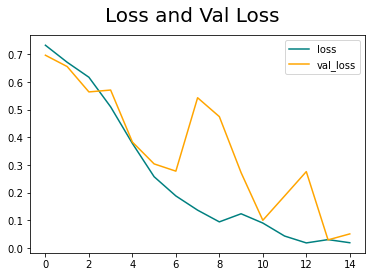

In [731]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss and Val Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()
# interesting findings

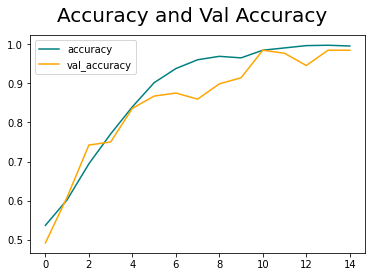

In [732]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy and Val Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()
# interesting findings

# Evaluating Performance

### Evaluate/Validation

In [733]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [734]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [735]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 64ms/step


In [736]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.98717946, shape=(), dtype=float32) tf.Tensor(0.98717946, shape=(), dtype=float32) tf.Tensor(0.984252, shape=(), dtype=float32)


### Test

In [44]:
import cv2

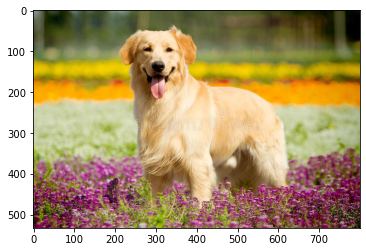

In [45]:
img = cv2.imread('D:\dogtest2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

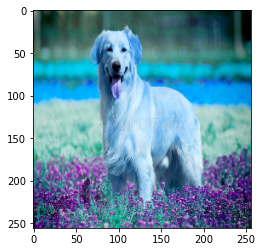

In [46]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [47]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [48]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 252ms/step


In [49]:
yhat

array([[0.8279518]], dtype=float32)

In [50]:
if yhat > 0.5:
    print(f'Predicted class is a DOG')
else:
     print(f'Predicted class is a CAT')

Predicted class is a DOG


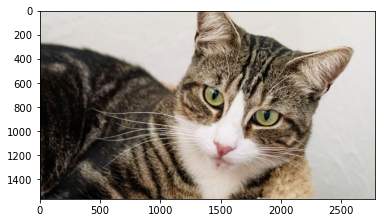

In [51]:
img = cv2.imread('D:\cattest2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

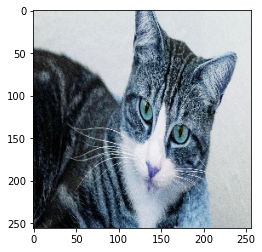

In [52]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [54]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 17ms/step


In [55]:
yhat

array([[0.00034929]], dtype=float32)

In [56]:
if yhat > 0.5:
    print(f'Predicted class is a DOG')
else:
     print(f'Predicted class is a CAT')

Predicted class is a CAT


# Saving Our Model

In [768]:
from tensorflow.keras.models import load_model

In [769]:
model.save(os.path.join('D:\models','dogsvscatsimageclassification.h5'))

In [770]:
new_model = load_model(os.path.join('D:\models','dogsvscatsimageclassification.h5'))

In [771]:
new_model